# Plot SpecParam Results
Plot schematic of LFP spectral parameterization results (exponent, r-squared, and stimulus-evoked changes in these parameters) 

#### Set path

In [1]:
# Define paths
REPO_PATH = r"C:\Users\micha\projects\v1_v4_1024_elec" # set this
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'


#### Imports

In [2]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import odml
import os

# custom
import sys
sys.path.append(REPO_PATH)
from scripts.plots import plot_schematic

#### Settings

In [19]:
# Session of interest (will ultimately apply to all sessions)
SESSIONS = ["A_SNR_140819", "L_SNR_250717"]
SESSION = "A_SNR_140819"

#### Functions

### Demo plotting function on arbitrary data

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.


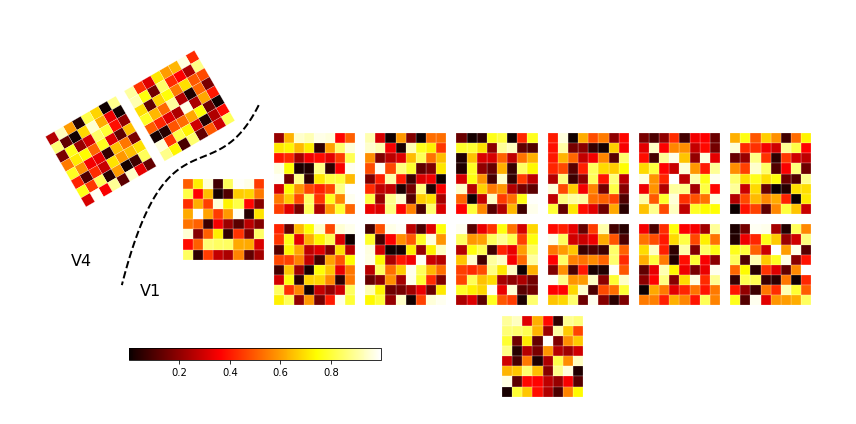

In [4]:
# define odml file path (contains metadata including electrode positions)
odml_path = fr"{PROJECT_PATH}\data\dataset\{SESSION}\metadata_{SESSION}.odml"

# define arbitrary data
data = np.random.rand(1024)

# plot
fig, ax = plot_schematic(data, odml_path)

### Main

##### create directory for figures

In [5]:
dir_figs = f"{PROJECT_PATH}/figures/params_schematic"
if not os.path.exists(dir_figs):
    os.makedirs(dir_figs)

##### load data (DataFrame of SpecParam results)

In [13]:
df_allsessions = pd.read_csv(fr"{PROJECT_PATH}\data\results\allsessions_params_df.csv")
df_allsessions

,Unnamed: 0,session,array,channel,pre_exp,post_exp,pre_r2,post_r2
0,0,L_SNR_250717,1,0.0,2.569901,2.492235,0.998144,0.993418
1,1,L_SNR_250717,1,1.0,2.587164,2.518467,0.998581,0.996317
2,2,L_SNR_250717,1,2.0,2.314697,2.377205,0.999105,0.996485
3,3,L_SNR_250717,1,3.0,2.568548,2.739236,0.998739,0.994282
4,4,L_SNR_250717,1,4.0,2.524028,2.717064,0.998825,0.996706
...,...,...,...,...,...,...,...,...
2043,59,A_SNR_140819,16,59.0,3.063492,3.209208,0.997965,0.994508
2044,60,A_SNR_140819,16,60.0,3.127111,3.163642,0.998220,0.993972
2045,61,A_SNR_140819,16,61.0,3.117240,3.165855,0.998236,0.994099
2046,62,A_SNR_140819,16,62.0,3.020526,2.997330,0.998699,0.995834


##### Plot schematic of exponent results
3 plots: pre-stimulus exponent, post-stimulus exponent, and change in exponent

In [7]:
# setting limits for colorbar
limits = np.append(df_allsessions['pre_exp'],df_allsessions['post_exp'])
maxlim = max(limits)
minlim = min(limits)


warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[Non

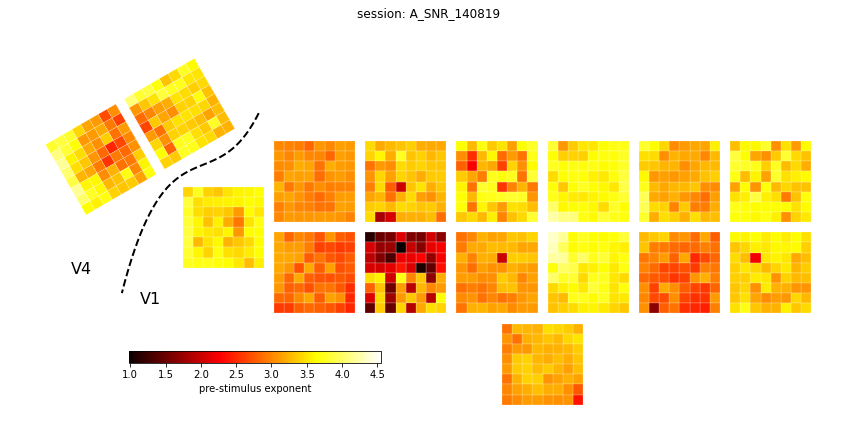

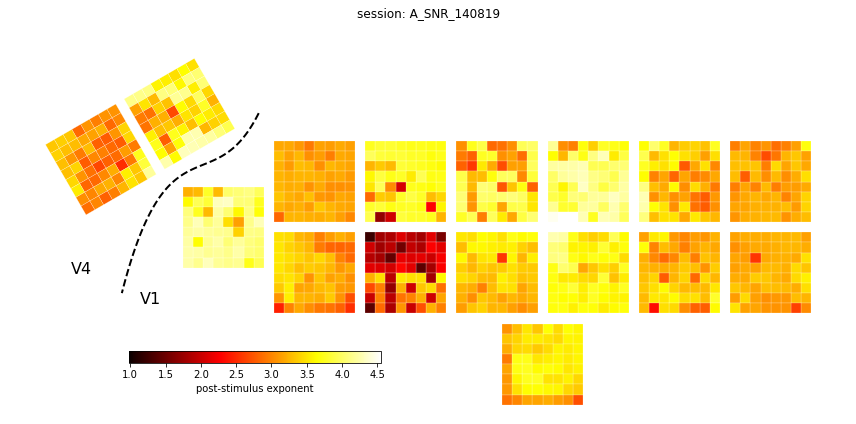

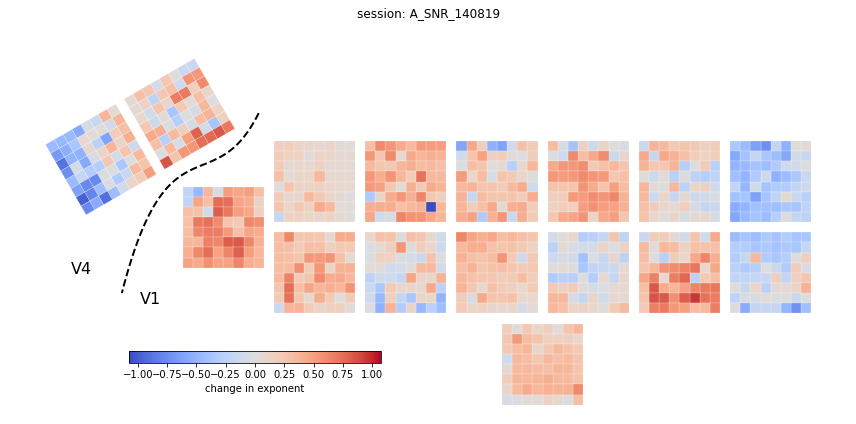

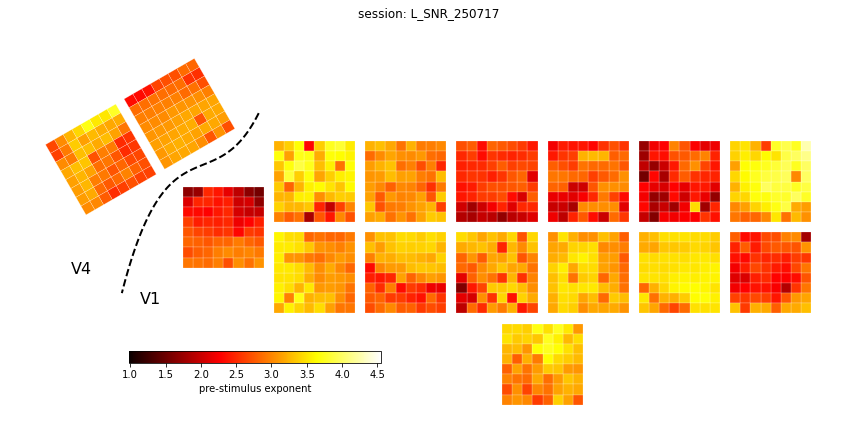

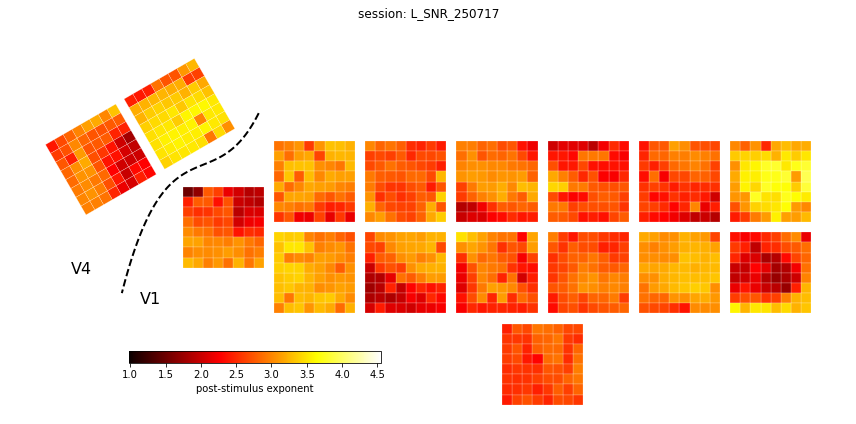

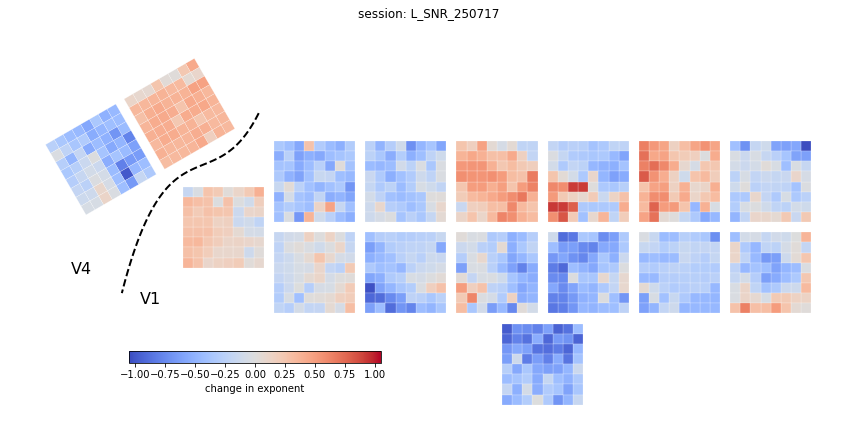

In [20]:
for session in SESSIONS:
    # get data for session
    df_session = df_allsessions[df_allsessions['session']==session]

    # pre-stimulus
    fig, ax = plot_schematic(df_session['pre_exp'], odml_path, title = f"session: {session}", label = "pre-stimulus exponent", vmin = minlim, vmax = maxlim, fname_out= f"{dir_figs}/{session}_exp_pre.png")

    # post-stimulus
    fig, ax = plot_schematic(df_session['post_exp'], odml_path, title = f"session: {session}", label = "post-stimulus exponent", vmin = minlim, vmax = maxlim, fname_out= f"{dir_figs}/{session}_exp_post.png")

    # change in exponent
    change = df_session['post_exp'] - df_session['pre_exp']
    ch_max = max(change)
    ch_min = min(change)
    fig, ax = plot_schematic(change, odml_path, norm_type = "centered", title = f"session: {session}", label = "change in exponent", vmin = ch_min, vmax = ch_max, fname_out= f"{dir_figs}/{session}_exp_change.png")


##### Plot schematic of goodness-of-fit results
3 plots: pre-stimulus r-squared, post-stimulus r-squared, and difference in r-squared

In [21]:
# setting limits for colorbar
lims = np.append(df_allsessions['pre_r2'],df_allsessions['post_r2'])
maxli = max(lims)
minli = min(lims)

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[Non

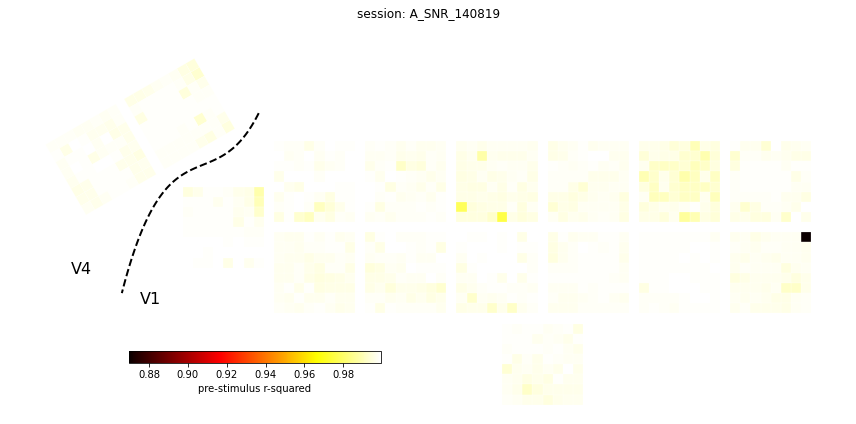

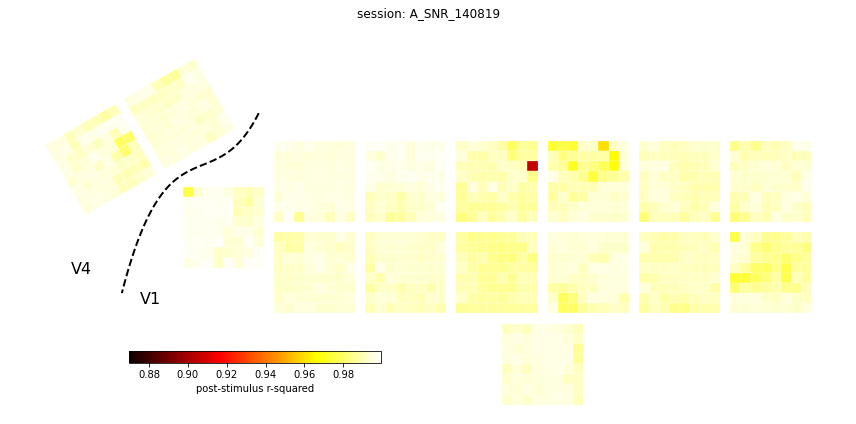

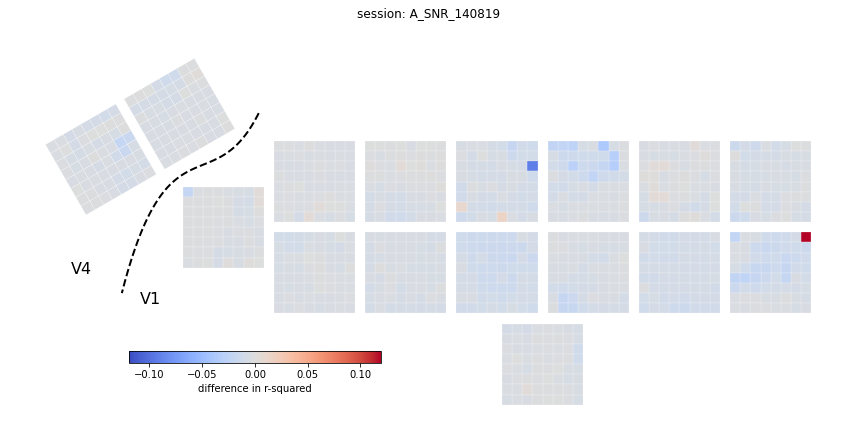

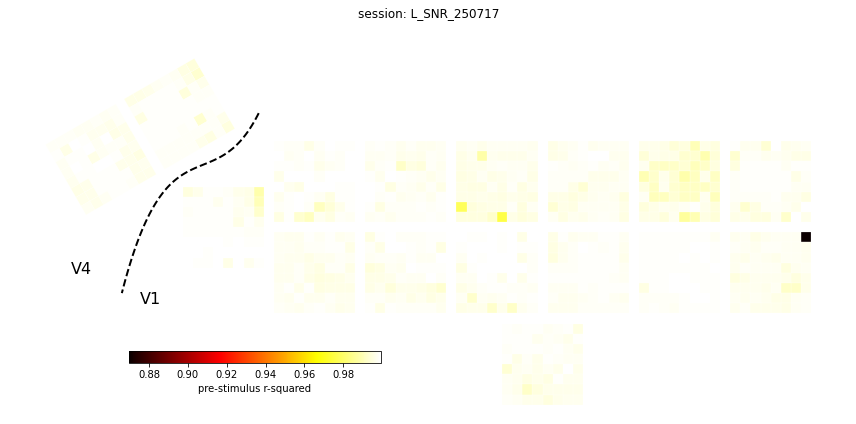

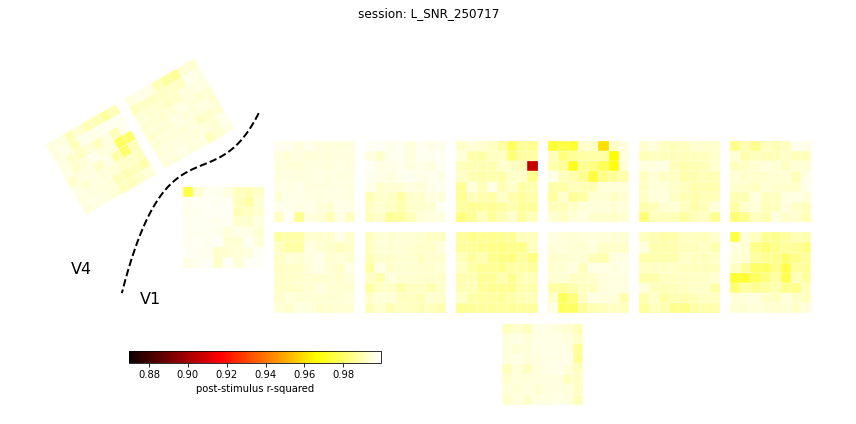

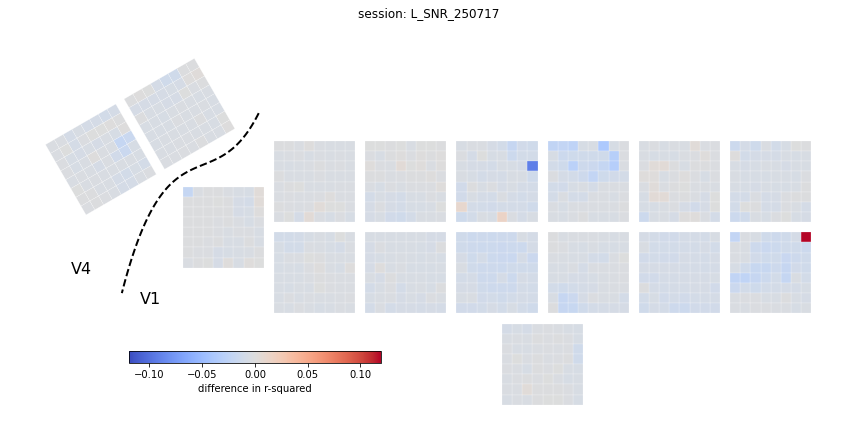

In [22]:
for session in SESSIONS:
    # get data for session
    df_session = df_allsessions[df_allsessions['session']==session]
    
    # pre-stimulus
    fig, ax = plot_schematic(df_allsessions['pre_r2'], odml_path, title = f"session: {session}", label = "pre-stimulus r-squared", vmin = minli, vmax = maxli, fname_out= f"{dir_figs}/{session}_r2_pre.png")

    # post-stimulus
    fig, ax = plot_schematic(df_allsessions['post_r2'], odml_path, title = f"session: {session}", label = "post-stimulus r-squared", vmin = minli, vmax = maxli, fname_out= f"{dir_figs}/{session}_r2_post.png")

    # change in exponent
    diff = df_allsessions['post_r2'] - df_allsessions['pre_r2']
    diff_max = max(diff)
    diff_min = min(diff)
    fig, ax = plot_schematic(diff, odml_path, norm_type = "centered", title = f"session: {session}", label = "difference in r-squared", vmin = diff_min, vmax = diff_max, fname_out= f"{dir_figs}/{session}_r2_diff.png")
